In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Polynomial Regression

### Formulation

The same idea works for fitting a degree $d$ polynomial model

$$
y = a_0 + a_1x + a_2x^2 + \cdots + a_dx^d
$$

to a set of $n+1$ data points

$$
(x_0,y_0), (x_1,y_1), \dots , (x_n,y_n)
$$

We form the matrices as before but now the Vandermonde matrix $X$ has $d+1$ columns

$$
X =
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^d \\\
1 & x_1 & x_1^2 & \cdots & x_1^d \\\
 & \vdots & & & \vdots \\\
1 & x_n & x_n^2 & \cdots & x_n^d
\end{bmatrix}
\ , \ \
\mathbf{y} =
\begin{bmatrix}
y_0 \\\
y_1 \\\
\vdots \\\
y_n
\end{bmatrix}
\ , \ \
\mathbf{a} =
\begin{bmatrix}
a_0 \\\
a_1 \\\
a_2 \\\
\vdots \\\
a_d
\end{bmatrix}
$$

The coefficients $\mathbf{a} = [a_0,a_1,a_2,\dots,a_d]^T$ which minimize the sum of squared errors $SSE$ is the unique solution of the linear system

$$
\left( X^T X \right) \mathbf{a} = \left( X^T \right) \mathbf{y}
$$

Let's build some fake data using a quadratic model $y = a_0 + a_1x + a_2x^2 + a_3x^3 + \epsilon$ and use linear regression to retrieve the coefficients $a_0$, $a_1$ and $a_2$.

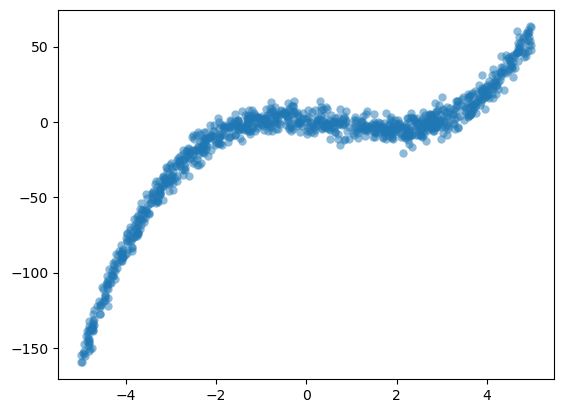

In [7]:
a0 = 1
a1 = -3
a2 = -2
a3 = 1
N = 1000
x = 10*np.random.rand(N) - 5 # Random numbers in the interval (-5,5)
noise = 5*np.random.randn(N)
y = a0 + a1*x + a2*x**2 + a3*x**3 + noise
plt.scatter(x,y,alpha=0.5,lw=0);
plt.show()

In [8]:
X = np.column_stack([np.ones(N), x])
sol = la.solve(X.T @ X, X.T @ y)

In [9]:
sol

array([-15.82118076,  11.79270154])

Linear regression

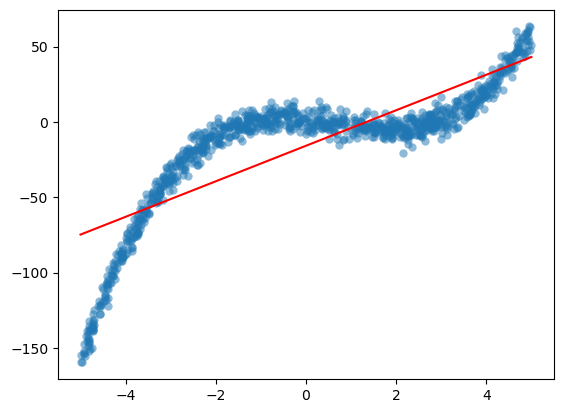

In [11]:
grid = np.linspace(-5, 5, 1000)
Y = sol[0]+sol[1]*grid
plt.plot(grid,Y, 'r');
plt.scatter(x,y,alpha=0.5,lw=0);
plt.show()

Quadratic

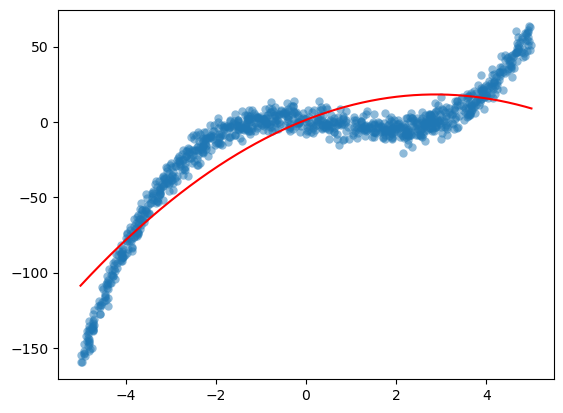

In [12]:
X = np.column_stack([np.ones(N), x, x**2])
sol = la.solve(X.T @ X, X.T @ y)
grid = np.linspace(-5, 5, 1000)
Y = sol[0]+sol[1]*grid + sol[2]*grid**2
plt.plot(grid,Y, 'r');
plt.scatter(x,y,alpha=0.5,lw=0);
plt.show()


Cubic

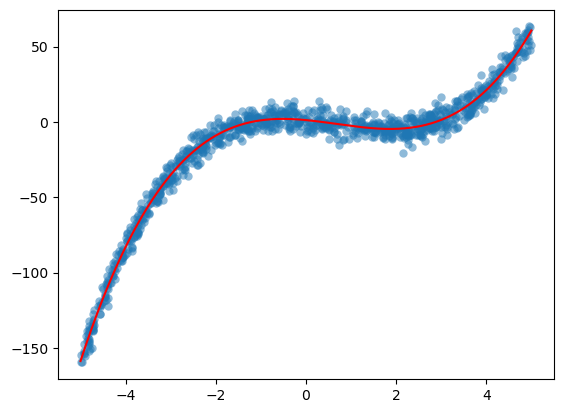

In [13]:
X = np.column_stack([np.ones(N), x, x**2, x**3])
sol = la.solve(X.T @ X, X.T @ y)
grid = np.linspace(-5, 5, 1000)
Y = sol[0]+sol[1]*grid + sol[2]*grid**2 + sol[3]*grid**3
plt.plot(grid,Y, 'r');
plt.scatter(x,y,alpha=0.5,lw=0);
plt.show()